## Раздел "1.5 Обработка данных в Python. Библиотека Pandas."

##  Практическое задание

Для датасета https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries   

- Сгруппируйте вакансии по направлениями (DS, DE, Software Engenering, etc.)  
- Какая средняя и медианная зарплата по группам вакансий?  
- Какая средняя и медианная зарплата по каждому региону?  
- Какая самая высокооплачиваемая из групп вакансий, исходя из их средних зарплат?  
- Какое процентное соотношение каждого региона по вакансиям от всех вакансий?  
- Какая корреляция уровня опыта от зарплаты?  
- Сколько должностей в наборе данных?  
- Какие 10 наиболее часто встречающихся должностей?  

#### Решение

In [1]:
import pandas as pd

In [6]:
data = pd.read_csv('ds_salaries.csv', index_col=0)

In [7]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


#### Сгруппируйте вакансии по направлениями (DS, DE, Software Engenering, etc.)

Разделим все вакансии на пять групп:
1. DS (Data Science, Data Scientist)
2. DE (Data Engineering, Data Engineer)
3. DA (Data Analytics, Data Analyst)
4. ML (Machine Learning, ML Engineer)
5. Other

In [18]:
data['group'] = 'Other'
data.loc[data.job_title.str.contains('Data Scien'), 'group'] = 'DS'
data.loc[data.job_title.str.contains('Data Engineer'), 'group'] = 'DE' 
data.loc[data.job_title.str.contains('Data Analy'), 'group'] = 'DA' 
data.loc[data.job_title.str.contains('Machine Learning')|data.job_title.str.contains('ML'), 'group'] = 'ML' 

In [20]:
data[['job_title', 'group']].head(10)

,job_title,group
0,Data Scientist,DS
1,Machine Learning Scientist,ML
2,Big Data Engineer,DE
3,Product Data Analyst,DA
4,Machine Learning Engineer,ML
5,Data Analyst,DA
6,Lead Data Scientist,DS
7,Data Scientist,DS
8,Business Data Analyst,DA
9,Lead Data Engineer,DE


In [23]:
# Число вакансий в каждой из групп
data.group.value_counts()

DS       192
DE       158
DA       131
ML        68
Other     58
Name: group, dtype: int64

In [24]:
# Вакансии в группе 'DS'
data.loc[data.group == 'DS', 'job_title'].value_counts()

Data Scientist              143
Data Science Manager         12
Principal Data Scientist      7
Data Science Consultant       7
Director of Data Science      7
Applied Data Scientist        5
Head of Data Science          4
Data Science Engineer         3
Lead Data Scientist           3
Staff Data Scientist          1
Name: job_title, dtype: int64

In [25]:
# Вакансии в группе 'DE'
data.loc[data.group == 'DE', 'job_title'].value_counts()

Data Engineer                   132
Big Data Engineer                 8
Lead Data Engineer                6
Data Engineering Manager          5
Principal Data Engineer           3
Cloud Data Engineer               2
Director of Data Engineering      2
Name: job_title, dtype: int64

In [26]:
# Вакансии в группе 'DA'
data.loc[data.group == 'DA', 'job_title'].value_counts()

Data Analyst               97
Data Analytics Manager      7
BI Data Analyst             6
Business Data Analyst       5
Data Analytics Engineer     4
Lead Data Analyst           3
Financial Data Analyst      2
Principal Data Analyst      2
Product Data Analyst        2
Data Analytics Lead         1
Marketing Data Analyst      1
Finance Data Analyst        1
Name: job_title, dtype: int64

In [27]:
# Вакансии в группе 'ML'
data.loc[data.group == 'ML', 'job_title'].value_counts()

Machine Learning Engineer                   41
Machine Learning Scientist                   8
ML Engineer                                  6
Applied Machine Learning Scientist           4
Machine Learning Developer                   3
Machine Learning Infrastructure Engineer     3
Head of Machine Learning                     1
Machine Learning Manager                     1
Lead Machine Learning Engineer               1
Name: job_title, dtype: int64

In [28]:
# Вакансии в группе 'Other'
data.loc[data.group == 'Other', 'job_title'].value_counts()

Research Scientist                   16
Data Architect                       11
AI Scientist                          7
Computer Vision Engineer              6
Head of Data                          5
Analytics Engineer                    4
Computer Vision Software Engineer     3
ETL Developer                         2
NLP Engineer                          1
Data Specialist                       1
3D Computer Vision Researcher         1
Big Data Architect                    1
Name: job_title, dtype: int64

#### Какая средняя и медианная зарплата по группам вакансий?

In [34]:
data.groupby('group').agg({'salary_in_usd': ['mean', 'median']}).round().sort_values(by=('salary_in_usd', 'mean'), ascending=False)

salary_in_usd        
               mean  median
group                      
DS         119125.0  115957
DE         115809.0  108912
Other      114900.0   97908
ML         113026.0   87932
DA          96527.0   91000

#### Какая средняя и медианная зарплата по каждому региону?

In [35]:
data.groupby('company_location').agg({'salary_in_usd': ['mean', 'median']}).round().sort_values(by=('salary_in_usd', 'mean'), ascending=False)

salary_in_usd          
                          mean    median
company_location                        
RU                    157500.0  157500.0
US                    144055.0  135000.0
NZ                    125000.0  125000.0
IL                    119059.0  119059.0
JP                    114127.0   75682.0
AU                    108043.0   87425.0
AE                    100000.0  115000.0
DZ                    100000.0  100000.0
IQ                    100000.0  100000.0
CA                     99824.0   81896.0
SG                     89294.0   89294.0
BE                     85699.0   85699.0
DE                     81887.0   78015.0
GB                     81583.0   78526.0
AT                     72921.0   69490.0
CN                     71666.0   71666.0
IE                     71444.0   71444.0
PL                     66082.0   41094.0
CH                     64114.0   64114.0
FR                     63971.0   56738.0
SI                     63831.0   63831.0
RO                     60000.0   60000.0
NL                     54946.0   54021.0
DK                     54386.0   45896.0
ES                     53060.0   48372.0
GR                     52293.0   49461.0
CZ                     50937.0   50937.0
PT                     47794.0   54218.0
HR                     45618.0   45618.0
LU                     43943.0   59102.0
CL                     40038.0   40038.0
MY                     40000.0   40000.0
IT                     36366.0   36366.0
HU                     35735.0   35735.0
EE                     32974.0   32974.0
MX                     32123.0   33511.0
NG                     30000.0   30000.0
IN                     28582.0   22124.0
MT                     28369.0   28369.0
CO                     21844.0   21844.0
TR                     20097.0   20171.0
HN                     20000.0   20000.0
BR                     18603.0   18907.0
AS                     18053.0   18053.0
MD                     18000.0   18000.0
UA                     13400.0   13400.0
PK                     13333.0   12000.0
KE                      9272.0    9272.0
IR                      4000.0    4000.0
VN                      4000.0    4000.0

#### Какая самая высокооплачиваемая из групп вакансий, исходя из их средних зарплат?

In [45]:
data.groupby('group').agg({'salary_in_usd': 'mean'}).sort_values(by='salary_in_usd', ascending=False).head(1)

,salary_in_usd
group,
DS,119125.479167


#### Какое процентное соотношение каждого региона по вакансиям от всех вакансий?

In [50]:
data.company_location.value_counts(normalize=True) * 100

US    58.484349
GB     7.742998
CA     4.942339
DE     4.612850
IN     3.953871
FR     2.471170
ES     2.306425
GR     1.812191
JP     0.988468
NL     0.658979
AT     0.658979
PT     0.658979
PL     0.658979
TR     0.494234
PK     0.494234
AE     0.494234
MX     0.494234
AU     0.494234
DK     0.494234
LU     0.494234
BR     0.494234
NG     0.329489
SI     0.329489
CN     0.329489
CZ     0.329489
RU     0.329489
CH     0.329489
BE     0.329489
IT     0.329489
IE     0.164745
CL     0.164745
SG     0.164745
MY     0.164745
EE     0.164745
CO     0.164745
DZ     0.164745
IR     0.164745
HU     0.164745
VN     0.164745
KE     0.164745
NZ     0.164745
IL     0.164745
RO     0.164745
IQ     0.164745
MD     0.164745
UA     0.164745
HR     0.164745
MT     0.164745
HN     0.164745
AS     0.164745
Name: company_location, dtype: float64

#### Какая корреляция уровня опыта от зарплаты?

In [53]:
data['experience_level'].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [57]:
mapping = {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}

In [58]:
data['experience_level_code'] = data['experience_level'].map(mapping)

<AxesSubplot:xlabel='experience_level_code', ylabel='salary_in_usd'>

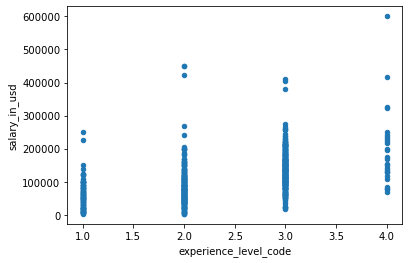

In [59]:
data.plot(x='experience_level_code', y='salary_in_usd', kind='scatter')

In [60]:
data['experience_level_code'].corr(data['salary_in_usd'])

0.48423288617306304

#### Сколько должностей в наборе данных?

In [64]:
# Всего записей в наборе данных
data.job_title.count()

607

In [62]:
# Уникальных должностей
data.job_title.nunique()

50

#### Какие 10 наиболее часто встречающихся должностей?

In [67]:
data.job_title.value_counts().head(10)

Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Principal Data Scientist        7
Name: job_title, dtype: int64